<a href="https://colab.research.google.com/github/Prahlad77044/ml_beginner/blob/main/Customer_Purchasing_Behaviors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model=LinearRegression()

In [ ]:
df=pd.read_csv("Customer Purchasing Behaviors.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB


In [ ]:
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


<ipython-input-87-eef84e7ff8f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


<Axes: xlabel='age', ylabel='Density'>

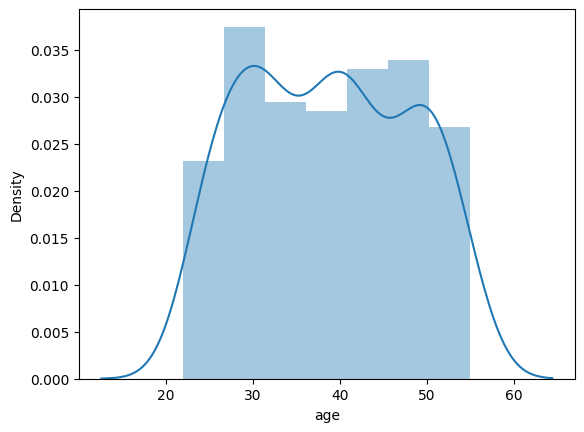

In [ ]:
sns.distplot(df["age"])

In [ ]:
X=df.drop('loyalty_score',axis=1)
y=df['loyalty_score']
region=pd.get_dummies(X['region'],drop_first=True)
X=X.drop('region',axis=1)
X=pd.concat([X,region],axis=1)
scaler=StandardScaler()
annual_income=scaler.fit_transform(df[['annual_income']])
X['annual_income']=annual_income
X_train,X_,y_train,y_=train_test_split(X,y,test_size=0.4,random_state=42)
X_cv,X_test,y_cv,y_test=train_test_split(X_,y_,test_size=0.2,random_state=42)


In [ ]:
pd.DataFrame(X)

,user_id,age,annual_income,purchase_amount,purchase_frequency,North,South,West
0,1,25,-1.090306,200,12,True,False,False
1,2,34,-0.211563,350,18,False,True,False
2,3,45,0.667180,500,22,False,False,True
3,4,22,-2.408420,150,10,False,False,False
4,5,29,-0.914557,220,13,True,False,False
...,...,...,...,...,...,...,...,...
233,234,40,0.227809,450,20,False,False,True
234,235,38,0.139934,430,20,True,False,False
235,236,54,1.458049,630,27,False,True,False
236,237,32,-0.475186,360,18,False,False,True


In [ ]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=linear_model.predict(X_test)
pd.DataFrame(y_pred)

,0
0,7.424971
1,6.289704
2,4.461600
3,4.239517
4,8.042468
5,9.073540
6,4.471090
7,6.984402
8,9.631293
9,4.104830


In [ ]:
from sklearn.metrics import r2_score

# Assuming y_test and y_pred are both one-dimensional
r2 = r2_score(y_test, y_pred)  # Correct method to calculate R² manually
print(f"R² Score: {r2}")

R² Score: 0.9849587181826258


In [ ]:
mse=mean_squared_error(y_cv,y_pred)
print(f" Mean Squared Errorr: {mse}")

In [ ]:
xgb_model=XGBRegressor(n_estimators=100)
xgb_model.fit(X_train,y_train)
y_pred_xgb=xgb_model.predict(X_test)

In [ ]:
r21 = r2_score(y_test, y_pred_xgb)  # Correct method to calculate R² manually
print(f"R² Score for XGB model: {r21}")
mse1=mean_squared_error(y_test,y_pred_xgb)
print(f"MSE for XGB model: {mse1}")

R² Score: 0.9994441037254825
MSE: 0.0017990332158138917


In [ ]:
X_train.head()

,user_id,age,annual_income,purchase_amount,purchase_frequency,North,South,West
41,42,37,0.052060,420,20,False,False,True
104,105,52,1.282300,610,26,False,False,True
144,145,38,0.139934,430,20,True,False,False
78,79,36,-0.299437,400,19,True,False,False
139,140,24,-2.232672,170,11,False,True,False


In [ ]:
test=np.array([42,37,0.052060,420,20,0,0,1])
y_predict=xgb_model.predict(test.reshape(1,-1))
y_predict


array([6.799882], dtype=float32)